<a href="https://colab.research.google.com/github/osunrinde/NGM-APP/blob/main/Breccia_Rock_classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing the necessary libraries needed for this project
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFilter
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, RandomizedSearchCV,StratifiedKFold
import glob
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten, Input, concatenate,BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import backend as K 
import os.path
from pathlib import Path
import shutil
from os import listdir
from keras.preprocessing.image import ImageDataGenerator

import cv2

seed=1234


# DATA LOADING

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The first step involve in this project is to successfully load the data (images and csv file) that will be used 

<a id=’section_1’></a>
## IMAGE LOADING

In [8]:
#Loading Image Main Path
Breccia_Train_Images ='/content/drive/MyDrive/Classroom/Elino_Images/TRAINING'
Breccia_Validation_Images ='/content/drive/MyDrive/Classroom/Elino_Images/VALIDATION'
Breccia_Test_Images = '/content/drive/MyDrive/Classroom/Elino_Images/TESTING'

In [9]:
#Verifying that Image path was loaded successfully
Breccia_Train_Images

'/content/drive/MyDrive/Classroom/Elino_Images/TRAINING'

In [10]:
#loading Each Breccia Type (Train Images) 
B1X_Train_Image = os.path.join(Breccia_Train_Images, '1BX')
B2X_Train_Image = os.path.join(Breccia_Train_Images, '2BX')
B3X_Train_Image = os.path.join(Breccia_Train_Images, '3BX')
CAVBX_Train_Image = os.path.join(Breccia_Train_Images, 'CAVBX')
FBX_Train_Image= os.path.join(Breccia_Train_Images, 'FBX')
MBX_Train_Image= os.path.join(Breccia_Train_Images, 'MBX')
NBX_Train_Image= os.path.join(Breccia_Train_Images, 'NBX')

In [11]:
#Verifying that Image path was loaded successful
B1X_Train_Image


'/content/drive/MyDrive/Classroom/Elino_Images/TRAINING/1BX'

In [12]:
#loading Each Breccia Type (Test Images) 
B1X_Test_Image = os.path.join(Breccia_Test_Images, '1BX')
B2X_Test_Image = os.path.join(Breccia_Test_Images, '2BX')
B3X_Test_Image = os.path.join(Breccia_Test_Images, '3BX')
CAVBX_Test_Image = os.path.join(Breccia_Test_Images, 'CAVBX')
FBX_Test_Image= os.path.join(Breccia_Test_Images, 'FBX')
MBX_Test_Image= os.path.join(Breccia_Test_Images, 'MBX')
NBX_Test_Image= os.path.join(Breccia_Test_Images, 'NBX')

In [13]:
#Verifying that Image path was loaded successfully
B2X_Test_Image

'/content/drive/MyDrive/Classroom/Elino_Images/TESTING/2BX'

In [14]:
#loading Each Breccia Type (Validation Images) 
B1X_Val_Image = os.path.join(Breccia_Validation_Images, '1BX')
B2X_Val_Image = os.path.join(Breccia_Validation_Images, '2BX')
B3X_Val_Image = os.path.join(Breccia_Validation_Images, '3BX')
CAVBX_Val_Image = os.path.join(Breccia_Validation_Images, 'CAVBX')
FBX_Val_Image= os.path.join(Breccia_Validation_Images, 'FBX')
MBX_Val_Image= os.path.join(Breccia_Validation_Images, 'MBX')
NBX_Val_Image= os.path.join(Breccia_Validation_Images, 'NBX')

In [15]:
#Verifying that Image path was loaded successfully
B2X_Val_Image

'/content/drive/MyDrive/Classroom/Elino_Images/VALIDATION/2BX'

## DATA SUMMARY

In [16]:
#Total Number of Train Images
import pathlib
path_Train=pathlib.Path(Breccia_Train_Images)
Total_Train_Images= len(list(path_Train.glob('*/*.jpg')))
Total_Train_Images

707

In [17]:
#Total Number of Validation Images
import pathlib
path_Val=pathlib.Path(Breccia_Validation_Images)
Total_Val_Images= len(list(path_Val.glob('*/*.jpg')))
Total_Val_Images 

175

In [18]:
#Total Number of Test Images
import pathlib
path_Test=pathlib.Path(Breccia_Test_Images)
Total_Test_Images= len(list(path_Test.glob('*/*.jpg')))
Total_Test_Images

218

In [19]:
# Total Images
TotalImages=Total_Train_Images+Total_Val_Images+Total_Test_Images  
TotalImages

1100

In [20]:
#Accessing Images within eacg folder
MBX_BRECCIA = list(path_Train.glob('MBX/*'))
MBX_BRECCIA[0]

PosixPath('/content/drive/MyDrive/Classroom/Elino_Images/TRAINING/MBX/ELINO-TRAIN IMAGES -NEW176.jpg')

In [21]:
"""
The next step is to write a function that can load every data in the image folder and save them to a list
"""

def loading_images(filepath):
    Full_image_data = []
    for core in glob.glob(filepath):
        core_images=cv2.imread(core)
        Full_image_data.append(core_images)
    return Full_image_data

In [22]:
#Loading images in 1BX_Train breccia folder

Core_im="/content/drive/MyDrive/Classroom/Elino_Images/TRAINING/1BX/*.jpg"
data=loading_images(Core_im)

<a id=’Image_Visualization’></a>
## IMAGE VISUALIZATION

In [23]:
"""
The next step is to write a function that can display first twenty images in each folder 
"""
        
def DISPLAY_CORE_IMAGES(file):
    n_cols=4
    n_rows=5
    plt.figure(figsize=(n_cols*4, n_rows*4))
    for display_image in range(0, n_cols*n_rows):
        plt.subplot(n_rows,n_cols, display_image+1)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.axis()
        plt.imshow(file[display_image]) 
    plt.show()

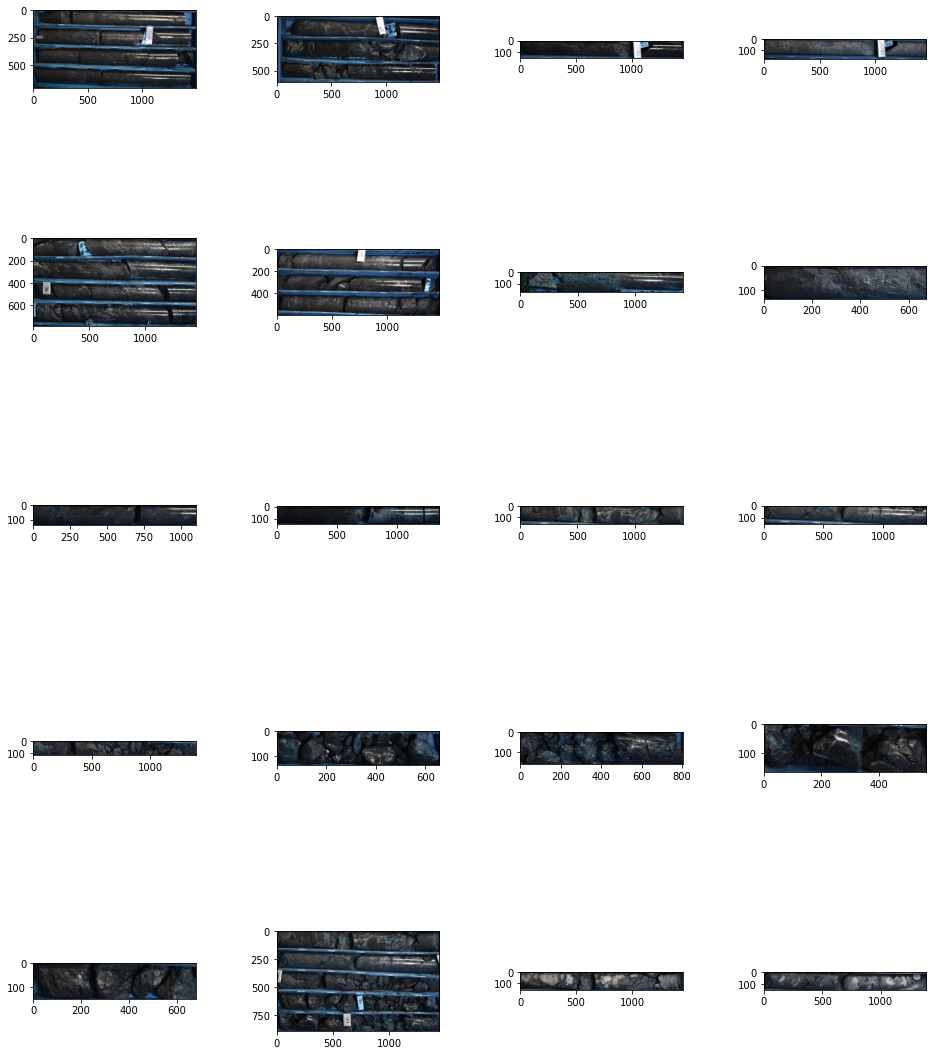

In [24]:
#Displaying the first 20 images in 1BX folder

DISPLAY_CORE_IMAGES(data)

* Note that the load_images and DISPLAY_CORE_IMAGES function above can be used to load an d display any rock images in a folder by providing the path to the folder.

# DATA PREPROCESSING

Considering the small amount of dataset availaible for developing the **Breccia Classification Model**, a preprocessing technique called **Data Agumentation** is required. Data Agumentation is a technique in machine learning used to reproduce different form of images either by *flipping*, *zooming*, *resizing* of the original images. This process will be carried out using a technique called **Image Data Generator**

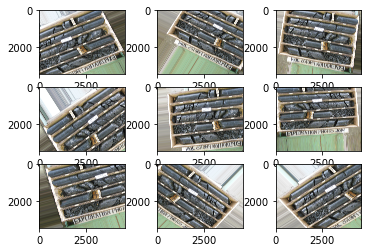

In [25]:
#A snippet to see what Data Augumentation will perform on the input rock images
from matplotlib import pyplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

First_1BX_Breccia_Image= load_img("/content/drive/MyDrive/Classroom/Elino_Images/TRAINING/1BX/ELINO-TRAIN IMAGES -NEW050.jpg")  # this is a PIL image

#Converting the image into an array for use by the ImageDataGenerator
Breccia_array= img_to_array(First_1BX_Breccia_Image) 
#Reshaping the input array
Breccia_array = Breccia_array.reshape((1,) + Breccia_array.shape)
data=datagen.flow(Breccia_array, batch_size=1)

# Generating the random Images using Image Generator
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# generate batch of images
    batch = data.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [26]:
"""
This is the augmentation configuration we will use for training. The following processes will
be performed on the train images. They are:
- Image Resizing
- Image Shearing
- Image Zooming
- Image flipping
                 
"""


Breccia_Train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [27]:
"""
This is the augmentation configuration we will use for Validation. The only
preprocessing process that will be utilized here is the Image Rescaling
                 
"""
Breccia_Val_datagen = ImageDataGenerator(rescale=1. / 255)

In [54]:
"""
This is the augmentation configuration we will use for Testing Dataset. The only
preprocessing process that will be utilized here is the Image Rescaling
                 
"""
Breccia_test_datagen = ImageDataGenerator(rescale=1. / 255)

In [28]:
# dimensions of our images.
img_width, img_height = 400, 600

epochs = 200
batch_size = 10

In [55]:
#Applying the agumentation to both train, validation, and test images
Breccia_train_generator = Breccia_Train_datagen.flow_from_directory(
    Breccia_Train_Images, 
    target_size =(img_width, img_height), 
    batch_size = batch_size, 
    class_mode ='categorical',
    shuffle=True) 
  
Breccia_validation_generator = Breccia_Val_datagen.flow_from_directory(
    Breccia_Validation_Images, 
    target_size =(img_width, img_height), 
    batch_size = batch_size, 
    shuffle=False) 

Breccia_test_generator = Breccia_test_datagen.flow_from_directory(
    Breccia_Test_Images, 
    target_size =(img_width, img_height), 
    batch_size = batch_size, 
    shuffle=False) 

Found 707 images belonging to 7 classes.
Found 175 images belonging to 7 classes.
Found 218 images belonging to 7 classes.


# MODEL DEVELOPMENT

## CONVOLUTIONAL NEURAL NETWORK

In [30]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_height, img_width) 
else: 
    input_shape = (img_height, img_width, 3) 

model = Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5, 5), padding='same', activation="relu", input_shape= input_shape))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.4))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())

#model.add(layers.GlobalMaxPooling2D())
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(7, activation="softmax"))

model.summary()

  
  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 600, 400, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 600, 400, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 300, 200, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 300, 200, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 200, 64)      102464    
                                                                 
 batch_normalization_1 (Batc  (None, 300, 200, 64)     2

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), metrics=['accuracy','Recall','Precision'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 30 continous epochs

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_randomized = EarlyStopping(monitor='val_loss', min_delta=0, patience=30)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [33]:
Breccia_model = model.fit(Breccia_train_generator, steps_per_epoch = Total_Train_Images // batch_size, epochs = epochs, validation_data=Breccia_validation_generator, validation_steps = Total_Val_Images // batch_size, callbacks=[early_stopping_randomized, model_checkpoint], verbose=1) 

Epoch 1/200
70/70 [==============================] - ETA: 0s - loss: 2.8830 - accuracy: 0.2080 - recall: 0.1148 - precision: 0.2180
Epoch 1: val_loss improved from inf to 4.51925, saving model to cifar_cnn_checkpoint_01_loss4.5192.h5
70/70 [==============================] - 424s 6s/step - loss: 2.8830 - accuracy: 0.2080 - recall: 0.1148 - precision: 0.2180 - val_loss: 4.5192 - val_accuracy: 0.1471 - val_recall: 0.1176 - val_precision: 0.1538
Epoch 2/200
70/70 [==============================] - ETA: 0s - loss: 2.4874 - accuracy: 0.2439 - recall: 0.1521 - precision: 0.2904
Epoch 2: val_loss did not improve from 4.51925
70/70 [==============================] - 95s 1s/step - loss: 2.4874 - accuracy: 0.2439 - recall: 0.1521 - precision: 0.2904 - val_loss: 4.5427 - val_accuracy: 0.1647 - val_recall: 0.1471 - val_precision: 0.1613
Epoch 3/200
70/70 [==============================] - ETA: 0s - loss: 2.3036 - accuracy: 0.2382 - recall: 0.1449 - precision: 0.2829
Epoch 3: val_loss improved from 

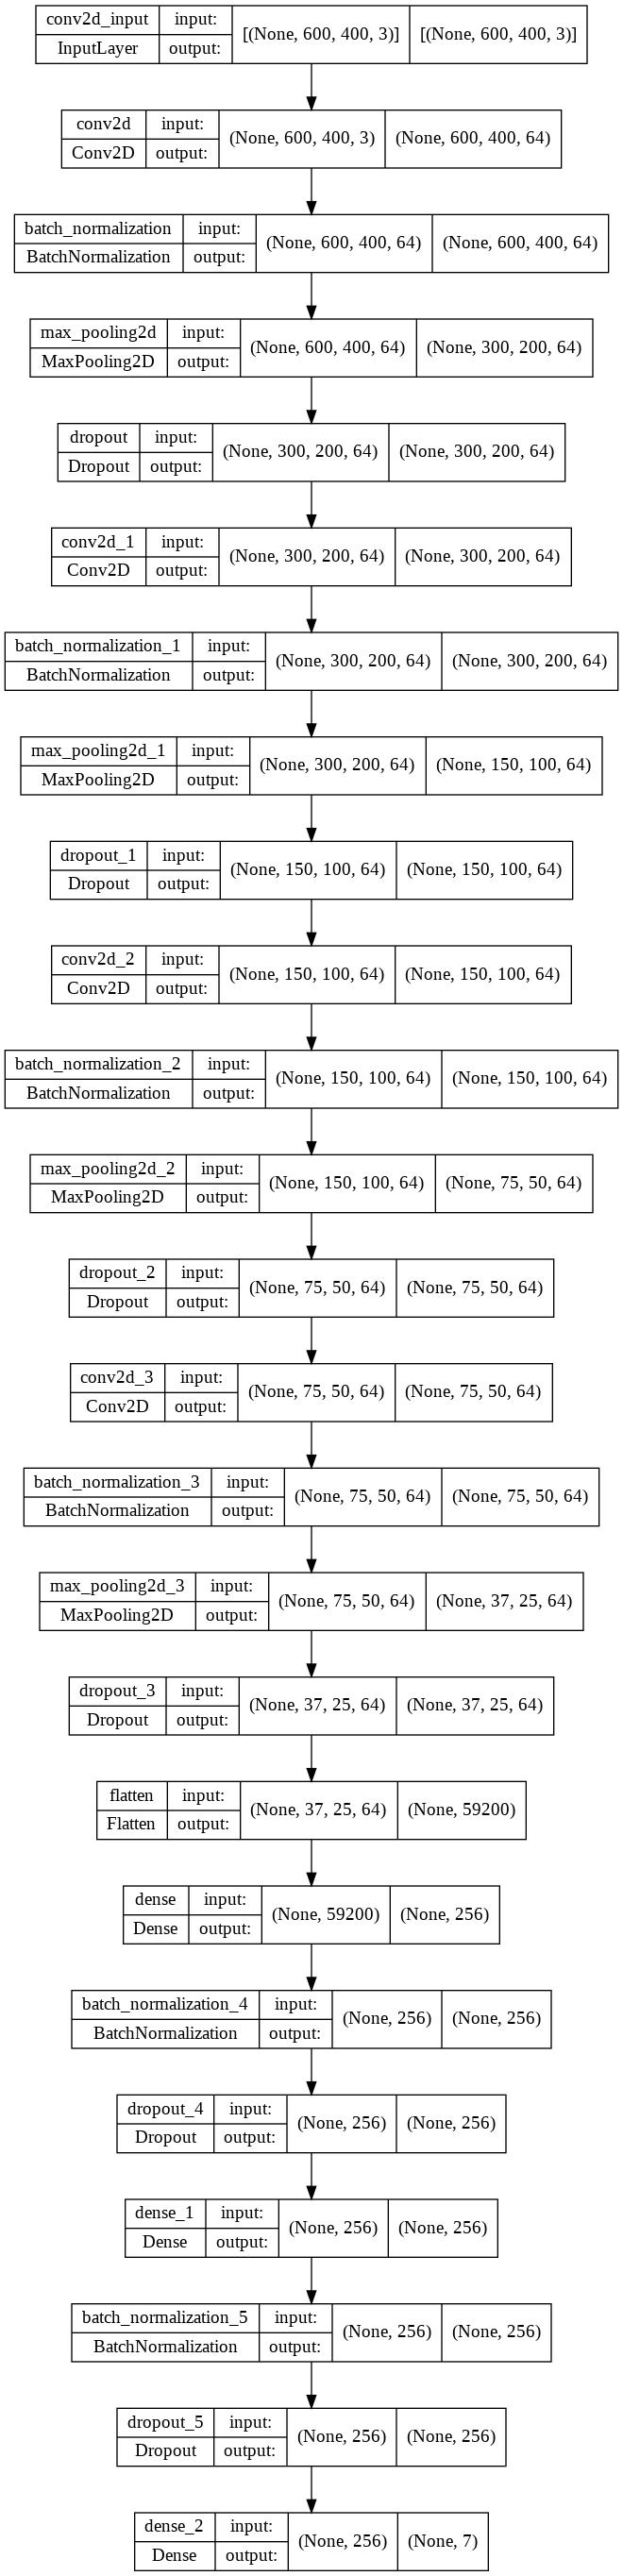

In [35]:
plot_model(model, 'Leaf Classification.jpg', show_shapes=True)

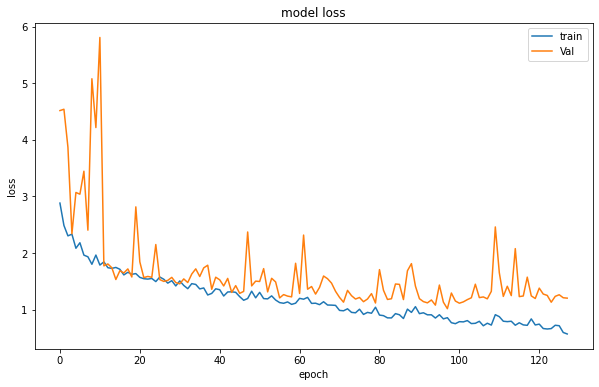

In [50]:
# plot training history
fig = plt.figure(figsize=[10,6])
plt.plot(Breccia_model.history['loss'], label='train')
plt.plot(Breccia_model.history['val_loss'], label='Val')
plt.legend(fontsize=10)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

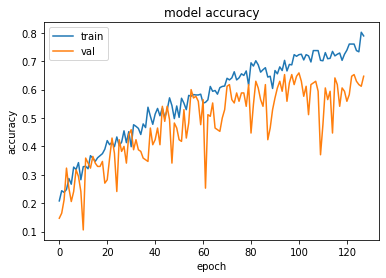

In [49]:
plt.plot(Breccia_model.history['accuracy'])
plt.plot(Breccia_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

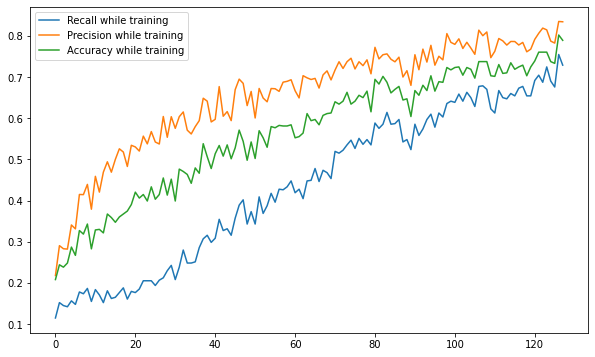

In [51]:
# Training metrics progress with runs 
fig = plt.figure(figsize=[10,6])
plt.plot(Breccia_model.history['recall'], label='Recall while training')
plt.plot(Breccia_model.history['precision'], label='Precision while training')
plt.plot(Breccia_model.history['accuracy'], label='Accuracy while training')
plt.legend(fontsize=10)
plt.show()

In [53]:
results = model.evaluate_generator(Breccia_validation_generator)
print('Validation loss is {}'.format(results[0]))
print()
print('Validation Accuracy is {}'.format(results[1]))
print()
print('Validation Recall is {}'.format(results[2]))
print()
print('Validation Precision is {}'.format(results[3]))
print()
print('Validation F1 Score is {}'.format(2*((results[2])*(results[3]))/(results[2]+results[3])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Validation loss is 1.2202562093734741

Validation Accuracy is 0.6342856884002686

Validation Recall is 0.6057142615318298

Validation Precision is 0.6883116960525513

Validation F1 Score is 0.6443768894040995


In [36]:
model.save_weights('Breccia_Rock_Weight.h5')
model.save('Breccia_Rock_Classifier.h5')

In [ ]:
#Testing Model with Blind Dataset

In [56]:
test_steps_per_epoch = np.math.ceil(Breccia_test_generator.samples / Breccia_test_generator.batch_size)

In [57]:
Breccia_predictions = model.predict_generator(Breccia_test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(Breccia_predictions, axis=1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [59]:
true_classes = Breccia_test_generator.classes
class_labels = list(Breccia_validation_generator.class_indices.keys()) 
class_labels

['1BX', '2BX', '3BX', 'CAVBX', 'FBX', 'MBX', 'NBX']

In [60]:

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

         1BX       0.52      0.33      0.41        36
         2BX       0.70      0.70      0.70        40
         3BX       0.56      0.73      0.64        37
       CAVBX       0.64      0.54      0.58        13
         FBX       0.65      0.71      0.68        21
         MBX       0.67      0.66      0.67        47
         NBX       0.63      0.71      0.67        24

    accuracy                           0.63       218
   macro avg       0.63      0.63      0.62       218
weighted avg       0.63      0.63      0.62       218



Text(0.5, 60.0, 'Predicted label')

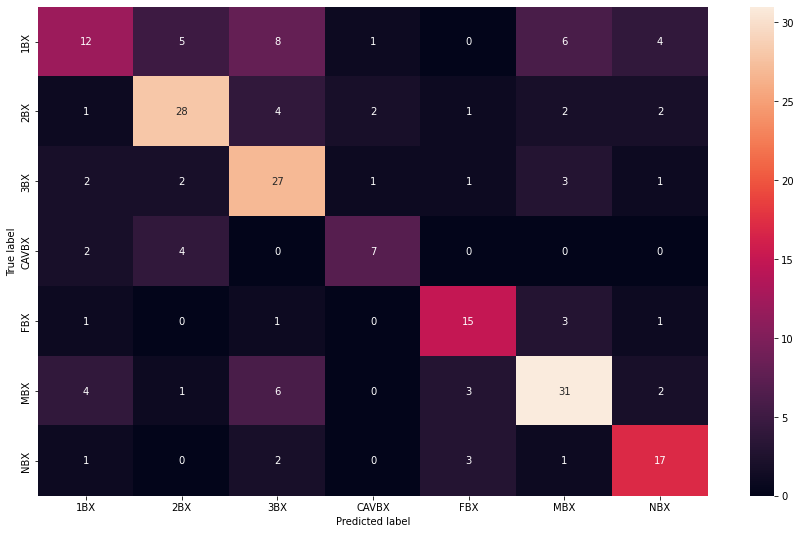

In [62]:
Breccia_Rock_Classifier_Confusionmatrix = confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(Breccia_Rock_Classifier_Confusionmatrix, index = [i for i in class_labels],
                     columns = [i for i in class_labels])
plt.figure(figsize = (15,9))
sns.heatmap(df_cm, annot=True, fmt='.2g')
plt.ylabel('True label')
plt.xlabel('Predicted label')